# Import Dependents

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load Data

In [1]:
df = pd.read_csv('resources/cookie_cats.csv')

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


# Run Analytics

In [12]:
# Counting the number of players in each AB group.
df.groupby('version').count()[['userid']]

,userid
version,
gate_30,44700
gate_40,45489


Text(0, 0.5, 'User Count')

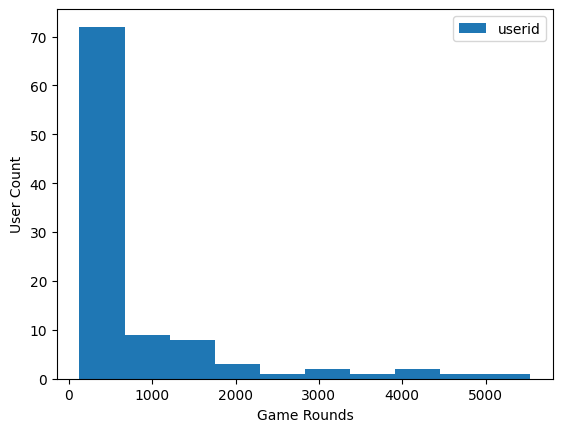

In [13]:
# Counting the number of players for each number of gamerounds 
plot_df = df.groupby('sum_gamerounds').count()[['userid']].reset_index().head(100)
ax = plot_df.plot(x='sum_gamerounds', y='userid', kind='hist')
ax.set_xlabel("Game Rounds")
ax.set_ylabel("User Count")

In [14]:
# The % of users that came back the day after they installed
df['retention_1'].value_counts()/len(df['retention_1'])

False    0.55479
True     0.44521
Name: retention_1, dtype: float64

In [15]:
# Calculating 1-day retention for each AB-group
df.groupby('version')['retention_1'].sum() / df.groupby('version')['userid'].count()

version
gate_30    0.448188
gate_40    0.442283
dtype: float64

<AxesSubplot: ylabel='Density'>

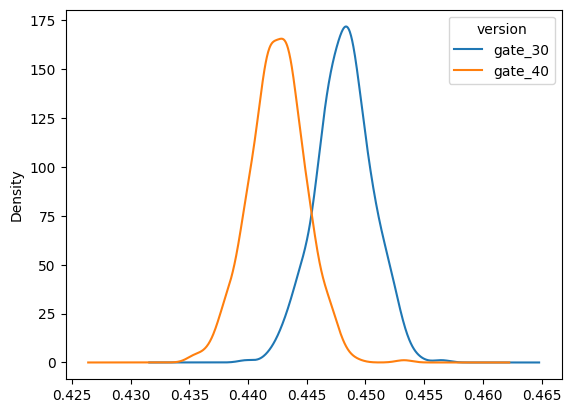

In [6]:
# Creating an list with bootstrapped means for each AB-group
boot_1d = []
for i in range(500):
    boot_mean = df.sample(frac=1, replace=True).groupby('version')['retention_1'].mean()
    boot_1d.append(boot_mean)
    
# Transforming the list to a DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='kde')

Text(0.5, 0, '% difference in means')

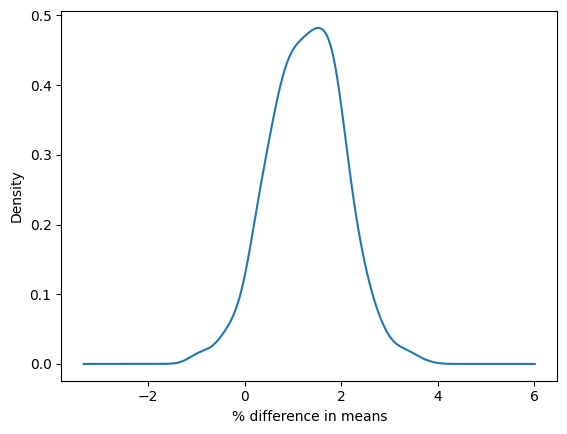

In [7]:
# Adding a column with the % difference between the two AB-groups
boot_1d['diff'] = (boot_1d['gate_30'] - boot_1d['gate_40']) /  boot_1d['gate_40'] * 100

# Ploting the bootstrap % difference
ax = boot_1d['diff'].plot(kind = 'kde')
ax.set_xlabel("% difference in means")

In [8]:
# Calculating the probability that 1-day retention 
# is greater when the gate is at level 30.
prob = (boot_1d['diff'] > 0).sum() / len(boot_1d)

# Pretty printing the probability
'{:.1%}'.format(prob)

'95.4%'

In [9]:
df.groupby('version')['retention_7'].sum() / df.groupby('version')['userid'].count()


version
gate_30    0.190201
gate_40    0.182000
dtype: float64

'99.8%'

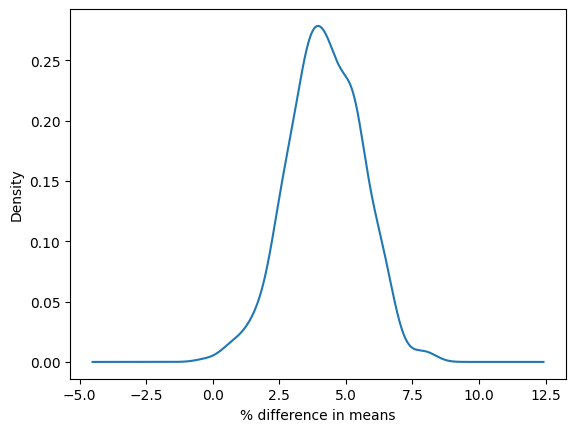

In [10]:
# Creating a list with bootstrapped means for each AB-group
boot_7d = []
for i in range(500):
    boot_mean = df.sample(frac=1, replace=True).groupby('version')['retention_7'].mean()
    boot_7d.append(boot_mean)
    
# Transforming the list to a DataFrame
boot_7d = pd.DataFrame(boot_7d)

# Adding a column with the % difference between the two AB-groups
boot_7d['diff'] = (boot_7d['gate_30'] - boot_7d['gate_40']) /  boot_7d['gate_30'] * 100

# Ploting the bootstrap % difference
ax = boot_7d['diff'].plot(kind = 'kde')
ax.set_xlabel("% difference in means")

# Calculating the probability that 7-day retention is greater when the gate is at level 30
prob = (boot_7d['diff'] > 0).sum() / len(boot_7d)

# Pretty printing the probability
'{:.1%}'.format(prob)

